In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

url = "https://docs.google.com/spreadsheets/d/1udcryyEYQktxx-5htXzIRGWmd2ci1SA9"
df = pd.read_csv(url + "/export?format=csv", encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [92]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="mixed")

In [93]:
# Remove NA for CustomerID
df = df[df["CustomerID"].notnull()]

In [94]:
# Remove duplicate
df = df.drop_duplicates()

In [95]:
df["CustomerID"] = df["CustomerID"].astype(int).astype(str)

In [96]:
df["UnitPrice"] = df["UnitPrice"].str.replace(",", ".").astype(float)

In [97]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   order_month  392692 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(5), period[M](1)
memory usage: 30.0+ MB


***We need to create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date and the second one is the truncated month of the purchase date.***

In [ ]:
# to_period("M") allow get value as yyyy-MM
df["order_month"] = df["InvoiceDate"].dt.to_period("M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12


In [104]:
# `df.groupby("CustomerID")`: groups the data by each customer.
# `["InvoiceDate"].transform("min")`: finds the first purchase date for each customer.
# `.dt.to_period("M")`: converts that date to a "year-month" format (like 2023-04), meaning all purchases are tagged by the customer’s first purchase month.
# `df["cohort"] = ...`: creates a new column called `"cohort"` that stores each customer's cohort month.
# If Customer A first bought something on April 15, 2023, then **every** transaction for this customer will have the `"cohort"` value `"2023-04"`.
# This setup helps you track customer behavior by cohort—for example, to see how customers who signed up in April continue purchasing over time.

df["cohort"] = df.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12


***Then, we aggregate the data per cohort and order_month and count the number of unique customers in each group.***

In [106]:
df_cohort = df.groupby(["cohort", "order_month"]).agg(n_customers=("CustomerID", "nunique")).reset_index(drop=False)
df_cohort.head()

,cohort,order_month,n_customers
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321


In [107]:
from operator import attrgetter
df_cohort["period_number"] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter("n"))
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4


***Then, we aggregate the data per cohort and order_month and count the number of unique customers in each group.***

In [108]:
cohort_pivot = df_cohort.pivot_table(index="cohort", columns="period_number", values="n_customers")
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

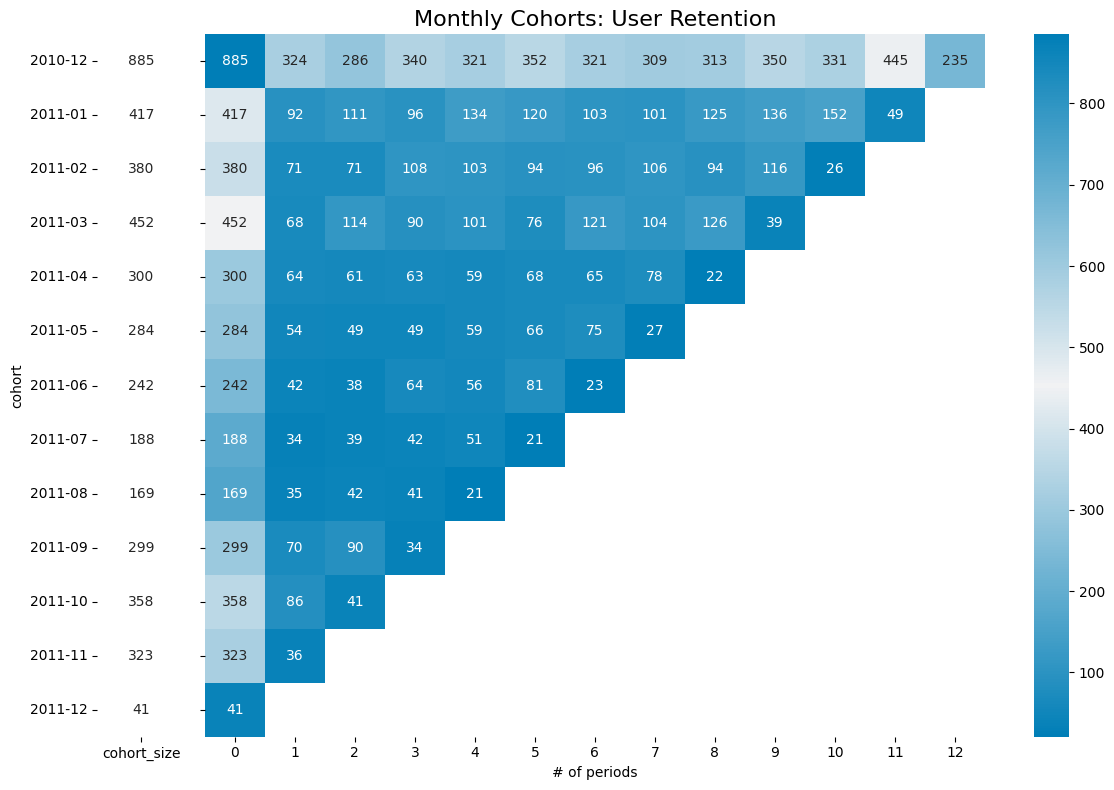

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(240, 240, s=100, l=50, as_cmap=True)
# retention matrix
sns.heatmap(cohort_pivot, 
            mask=cohort_pivot.isnull(), 
            annot=True, 
            fmt=".0f", 
            cmap=cmap, 
            ax=ax[1])
ax[1].set_title("Monthly Cohorts: User Retention", fontsize=16)
ax[1].set(xlabel="# of periods",
            ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt="g", 
            cmap=white_cmap, 
            ax=ax[0])

plt.tight_layout()
plt.show()

## Tính số lượng khách hàng churn?

In [125]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4


In [136]:
base = cohort_pivot[0]
n_customer_churn = cohort_pivot.apply(lambda col: base - col, axis=0)
n_customer_churn[0] = base
n_customer_churn

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,885.0,561.0,599.0,545.0,564.0,533.0,564.0,576.0,572.0,535.0,554.0,440.0,650.0
2011-01,417.0,325.0,306.0,321.0,283.0,297.0,314.0,316.0,292.0,281.0,265.0,368.0,NaN
2011-02,380.0,309.0,309.0,272.0,277.0,286.0,284.0,274.0,286.0,264.0,354.0,NaN,NaN
2011-03,452.0,384.0,338.0,362.0,351.0,376.0,331.0,348.0,326.0,413.0,NaN,NaN,NaN
2011-04,300.0,236.0,239.0,237.0,241.0,232.0,235.0,222.0,278.0,NaN,NaN,NaN,NaN
2011-05,284.0,230.0,235.0,235.0,225.0,218.0,209.0,257.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,200.0,204.0,178.0,186.0,161.0,219.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,154.0,149.0,146.0,137.0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,134.0,127.0,128.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size_churn = n_customer_churn.iloc[:, 0]
cohort_size_churn

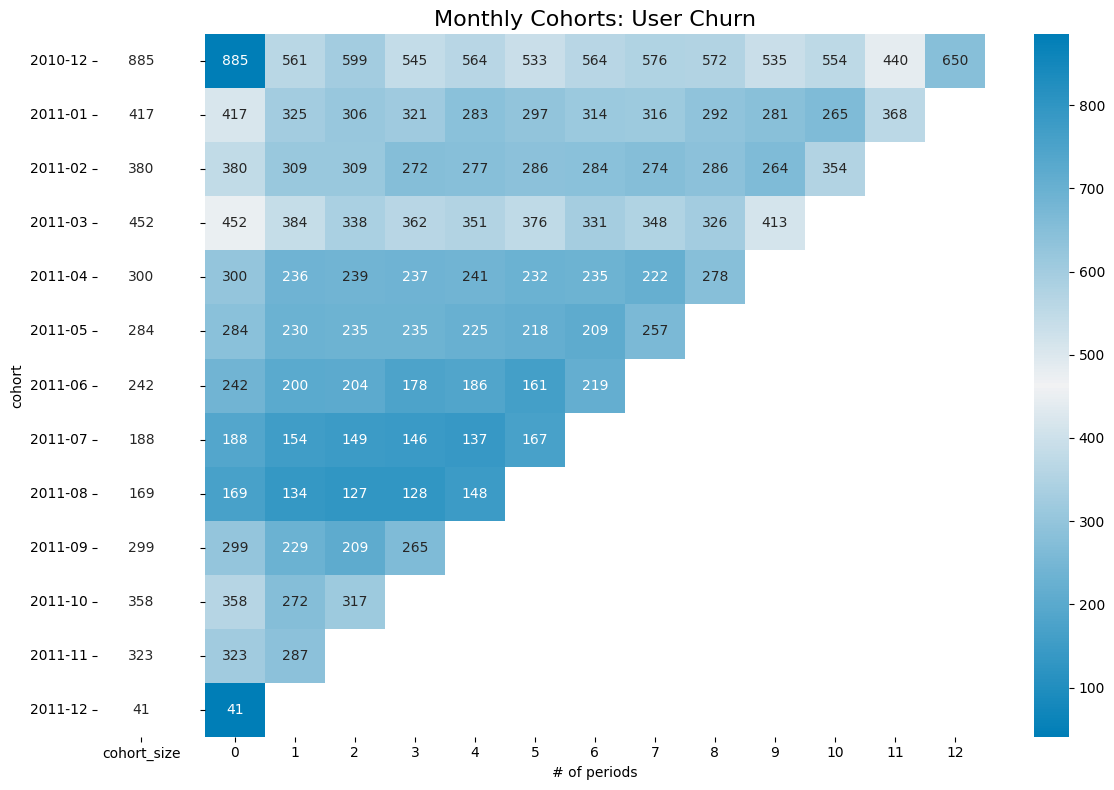

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(240, 240, s=100, l=50, as_cmap=True)
# retention matrix
sns.heatmap(n_customer_churn, 
            mask=n_customer_churn.isnull(), 
            annot=True, 
            fmt=".0f", 
            cmap=cmap, 
            ax=ax[1])
ax[1].set_title("Monthly Cohorts: User Churn", fontsize=16)
ax[1].set(xlabel="# of periods",
            ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size_churn).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt="g", 
            cmap=white_cmap, 
            ax=ax[0])

plt.tight_layout()
plt.show()

## Tính tỷ lệ giữ chân KH và vẽ chart cohort (%)

In [131]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

cohort
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [132]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


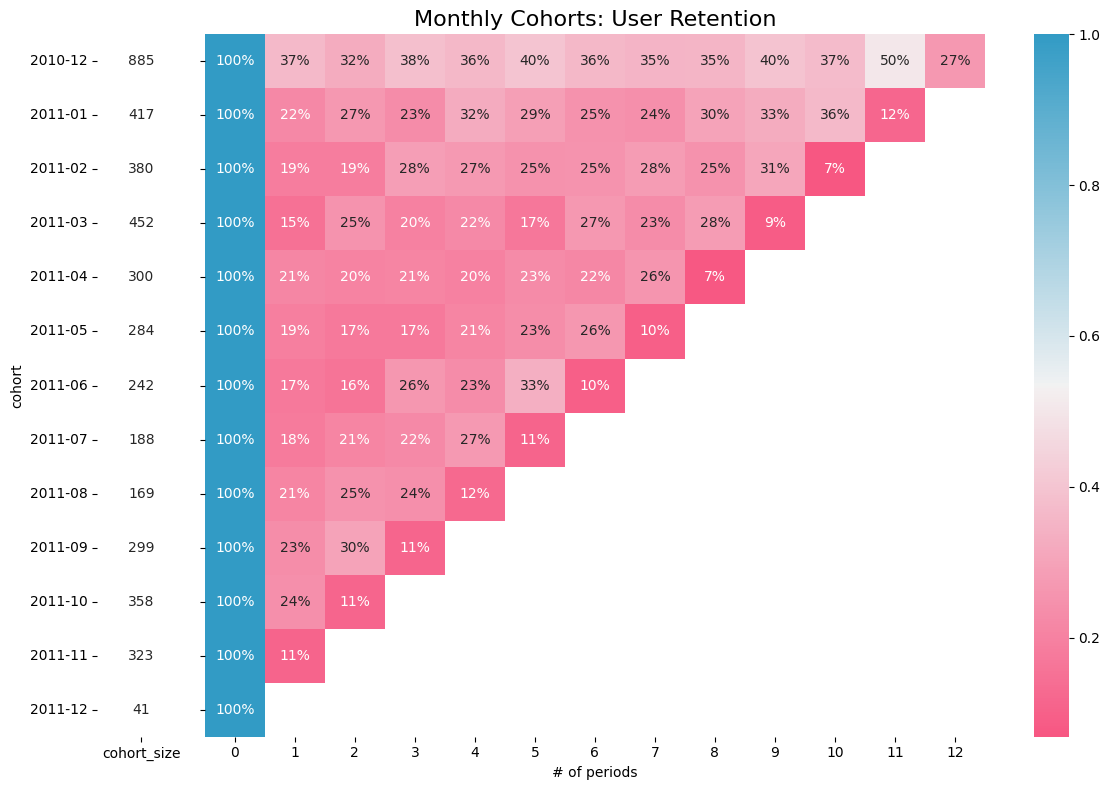

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# retention matrix
sns.heatmap(retention_matrix, 
            mask=retention_matrix.isnull(), 
            annot=True, 
            fmt=".0%", 
            cmap=cmap, 
            ax=ax[1])
ax[1].set_title("Monthly Cohorts: User Retention", fontsize=16)
ax[1].set(xlabel="# of periods",
            ylabel="")

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"})
white_cmap = mcolors.ListedColormap(["white"])
sns.heatmap(cohort_size_df, 
            annot=True, 
            cbar=False, 
            fmt="g", 
            cmap=white_cmap, 
            ax=ax[0])

plt.tight_layout()
plt.show()